2025-02-20 10:33:28.050 python[5032:111709] +[IMKClient subclass]: chose IMKClient_Modern
2025-02-20 10:33:28.050 python[5032:111709] +[IMKInputSession subclass]: chose IMKInputSession_Modern


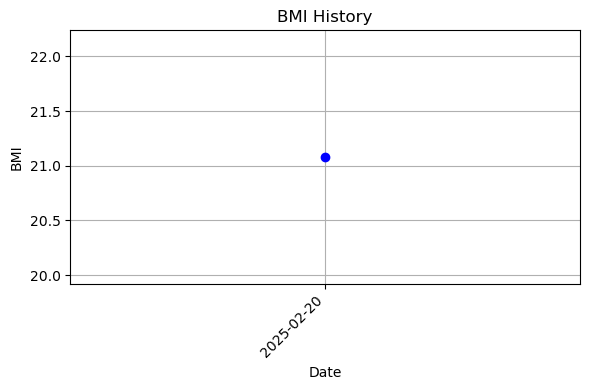

In [ ]:
import tkinter as tk
from tkinter import messagebox
import sqlite3
import matplotlib.pyplot as plt
import datetime

def calculate_bmi():
    try:
        weight = float(weight_entry.get())
        height = float(height_entry.get()) / 100  # Convert cm to meters
        if weight <= 0 or height <= 0:
            raise ValueError("Invalid input range")
        
        bmi = round(weight / (height ** 2), 2)
        category = categorize_bmi(bmi)
        result_label.config(text=f"BMI: {bmi}\nCategory: {category}")
        
        save_bmi_data(weight, height, bmi)
    except ValueError:
        messagebox.showerror("Error", "Please enter valid numerical values for weight and height.")

def categorize_bmi(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 24.9:
        return "Normal weight"
    elif 25 <= bmi < 29.9:
        return "Overweight"
    else:
        return "Obese"

def save_bmi_data(weight, height, bmi):
    conn = sqlite3.connect("bmi_data.db")
    cursor = conn.cursor()
    cursor.execute("""
        CREATE TABLE IF NOT EXISTS bmi_records (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            date TEXT,
            weight REAL,
            height REAL,
            bmi REAL
        )
    """)
    cursor.execute("INSERT INTO bmi_records (date, weight, height, bmi) VALUES (?, ?, ?, ?)",
                   (datetime.date.today(), weight, height, bmi))
    conn.commit()
    conn.close()

def show_history():
    conn = sqlite3.connect("bmi_data.db")
    cursor = conn.cursor()
    cursor.execute("SELECT date, bmi FROM bmi_records")
    records = cursor.fetchall()
    conn.close()
    
    if not records:
        messagebox.showinfo("BMI History", "No records found.")
        return
    
    dates = [record[0] for record in records]
    bmis = [record[1] for record in records]
    
    plt.figure(figsize=(6, 4))
    plt.plot(dates, bmis, marker='o', linestyle='-', color='b')
    plt.xlabel("Date")
    plt.ylabel("BMI")
    plt.title("BMI History")
    plt.grid(True)
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()

# Create main window
window = tk.Tk()
window.title("BMI Calculator")

# Weight input
weight_label = tk.Label(window, text="Weight (kg):")
weight_label.grid(row=0, column=0, padx=5, pady=5)
weight_entry = tk.Entry(window)
weight_entry.grid(row=0, column=1, padx=5, pady=5)

# Height input
height_label = tk.Label(window, text="Height (cm):")
height_label.grid(row=1, column=0, padx=5, pady=5)
height_entry = tk.Entry(window)
height_entry.grid(row=1, column=1, padx=5, pady=5)

# Calculate button
calculate_button = tk.Button(window, text="Calculate BMI", command=calculate_bmi)
calculate_button.grid(row=2, column=0, columnspan=2, padx=5, pady=10)

# Result label
result_label = tk.Label(window, text="")
result_label.grid(row=3, column=0, columnspan=2, padx=5, pady=5)

# History button
history_button = tk.Button(window, text="Show History", command=show_history)
history_button.grid(row=4, column=0, columnspan=2, padx=5, pady=10)

window.mainloop()